# Determine whether reference 12C genomic DNA could be used to determine 13C incorporation

* Compositional data issue:
  * Only ratios matter, so finding the mode in euclidean space from compositional data may be imposible
    * See example below
  * This may be able to be circumvented by marker genomic DNA. 
    * If 12C genomic DNA is added pre-fractionation, then variance from this marker distribution would give an indication of the BD of other taxa

# Init

In [1]:
%load_ext rpy2.ipython

In [16]:
%%R
library(dplyr)
library(tidyr)
library(ggplot2)
library(compositions)
library(coenocliner)
#library(robCompositions)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: tensorA

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘tensorA’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:base’:

    norm


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: energy

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: bayesm

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2

# Creating communities

## Community template

In [3]:
%%R 
set.seed(2)
M <- 3                                      # number of species
ming <- 1.60                                # gradient minimum...
maxg <- 1.80                                # ...and maximum
meang = mean(c(ming, maxg))
locs <- seq(ming, maxg, length = 30)        # gradient locations
opt  <- rnorm(M, mean=meang, sd=0)          # runif(M, min = ming, max = maxg)   # species optima
tol  <- rep(0.025, M)                       # species tolerances
h    <- ceiling(rlnorm(M, meanlog = 12))    # max abundances
pars <- cbind(opt = opt, tol = tol, h = h)  # put in a matrix

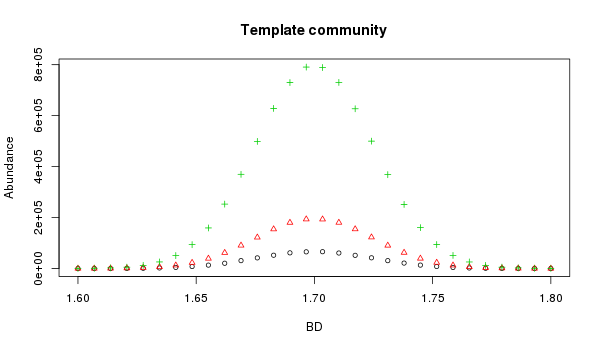

In [4]:
%%R -w 600 -h 350
mu1 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") #, countParams = list(alpha = 0.5))


matplot(locs, mu1, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Template community')

## control & treatment communities

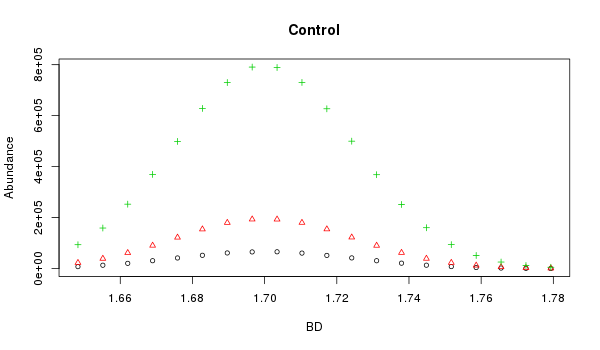

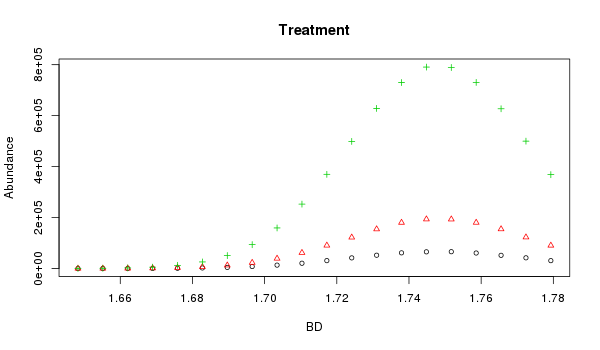

In [5]:
%%R -w 600 -h 350

n.frac = 19

start.cont = 8
comm.cont = mu1[start.cont:(start.cont+n.frac),]

start.treat = 1
comm.treat = mu1[start.treat:(start.treat+n.frac),]

locs.p = locs[start.cont:(start.cont+n.frac)]


matplot(locs.p, comm.cont, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control')
matplot(locs.p, comm.treat, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment')

## Convert to relative abundances

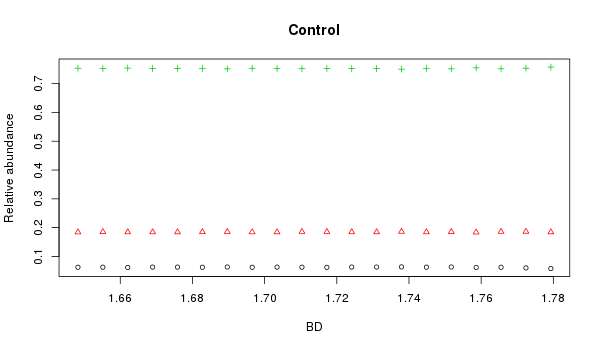

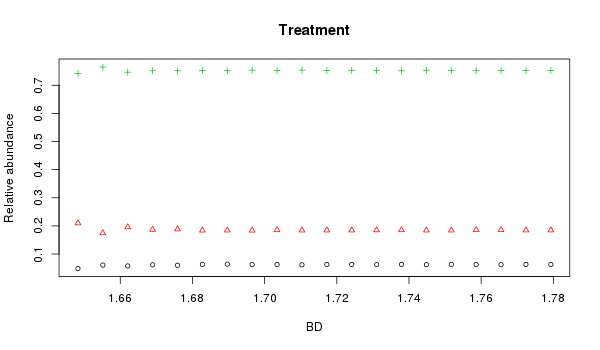

In [6]:
%%R -w 600 -h 350

to.rel = function(x){
    y = sum(x)
    if(y == 0){
        return(x)
    } else {
        return(x / y)
    }
}

comm.cont.rel = t(apply(comm.cont, 1, to.rel))
comm.treat.rel = t(apply(comm.treat, 1, to.rel))


matplot(locs.p, comm.cont.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs.p, comm.treat.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

# Using a 12C-marker

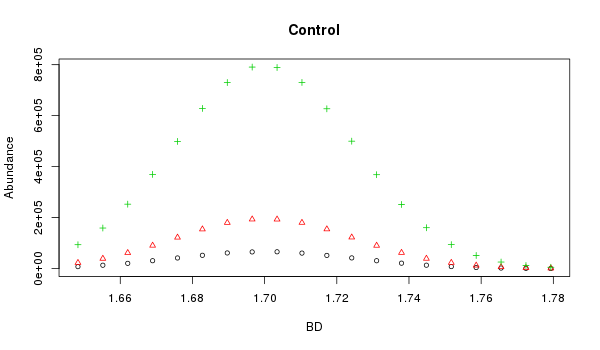

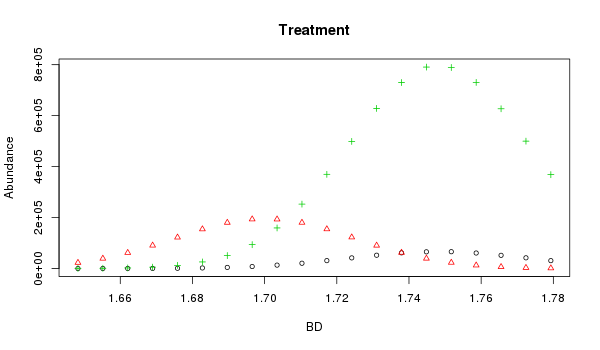

In [49]:
%%R -w 600 -h 350

n.frac = 19

start.cont = 8
comm.cont = mu1[start.cont:(start.cont+n.frac),]

start.treat = 1
comm.treat = mu1[start.treat:(start.treat+n.frac),]
comm.treat[,2] = comm.cont[,2]

locs.p = locs[start.cont:(start.cont+n.frac)]


matplot(locs.p, comm.cont, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control')
matplot(locs.p, comm.treat, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment')

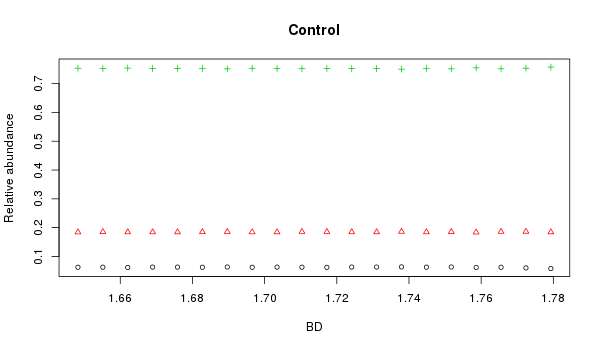

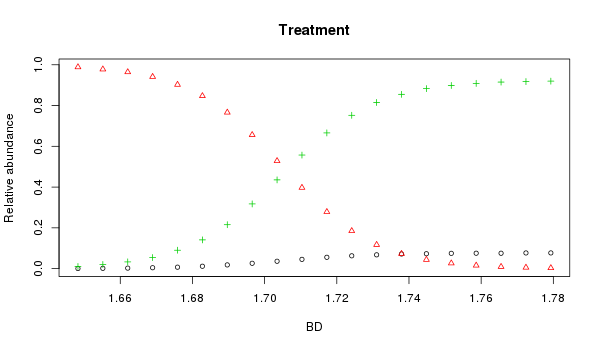

In [50]:
%%R -w 600 -h 350

comm.cont.rel = t(apply(comm.cont, 1, to.rel))
comm.treat.rel = t(apply(comm.treat, 1, to.rel))


matplot(locs.p, comm.cont.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs.p, comm.treat.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

## Marker taxon not spanning into heavy fractions

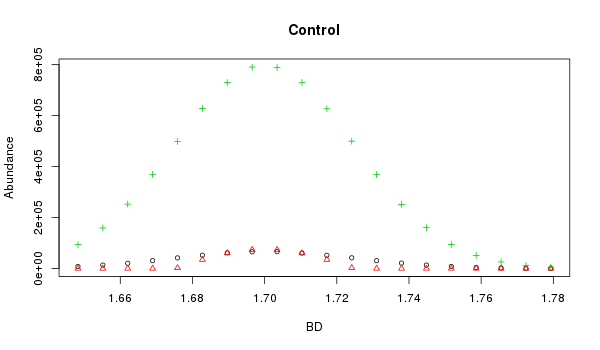

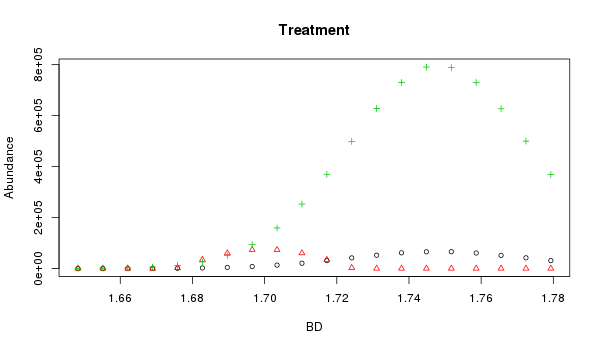

In [51]:
%%R -w 600 -h 350

m = 120000

comm.cont[,2] = comm.cont[,2] - m
comm.cont[comm.cont < 0] = 0

comm.treat[,2] = comm.treat[,2] - m
comm.treat[comm.treat < 0] = 0

matplot(locs.p, comm.cont, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control')
matplot(locs.p, comm.treat, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment')

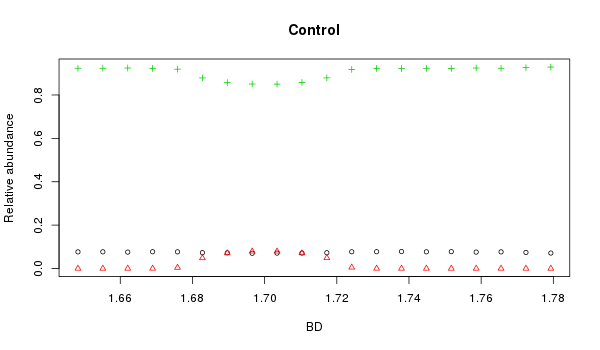

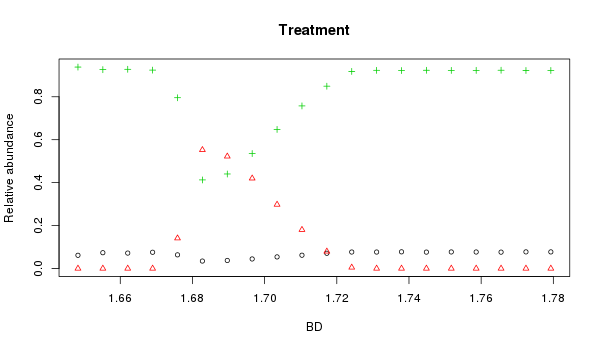

In [53]:
%%R -w 600 -h 350

comm.cont.rel = t(apply(comm.cont, 1, to.rel))
comm.treat.rel = t(apply(comm.treat, 1, to.rel))


matplot(locs.p, comm.cont.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs.p, comm.treat.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

# Compositional variation

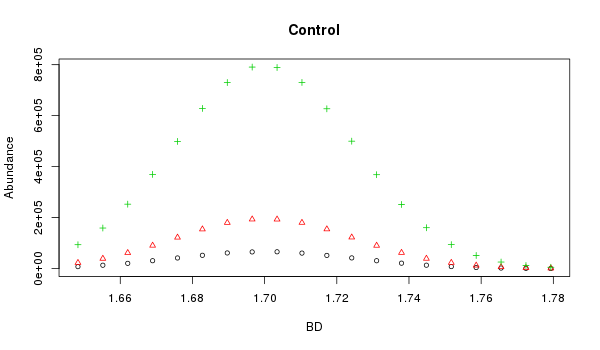

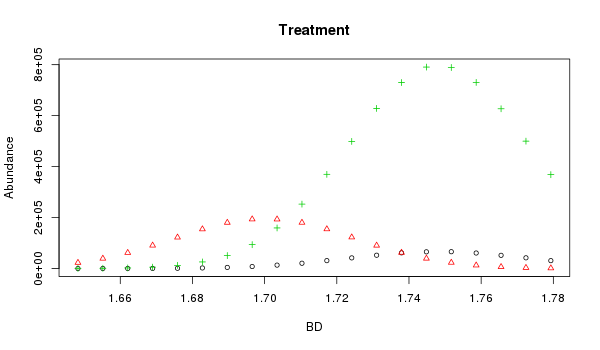

In [65]:
%%R -w 600 -h 350

n.frac = 19

start.cont = 8
comm.cont = mu1[start.cont:(start.cont+n.frac),]

start.treat = 1
comm.treat = mu1[start.treat:(start.treat+n.frac),]
comm.treat[,2] = comm.cont[,2]

locs.p = locs[start.cont:(start.cont+n.frac)]


matplot(locs.p, comm.cont, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control')
matplot(locs.p, comm.treat, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment')

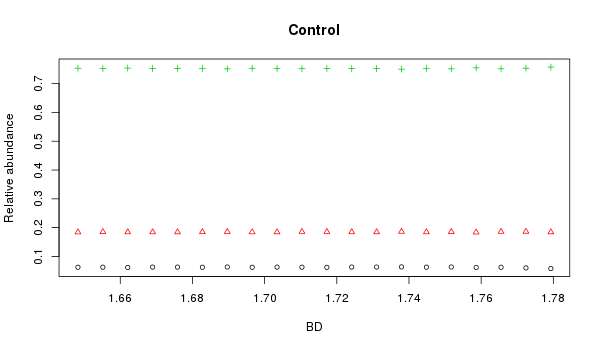

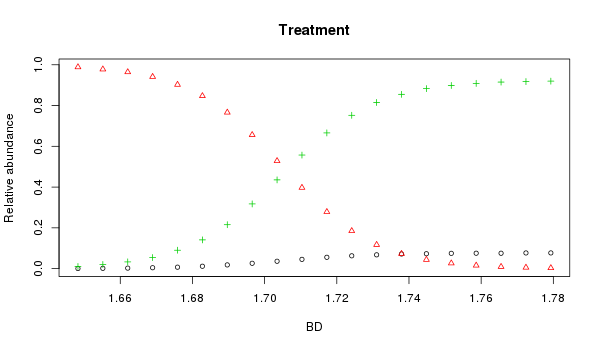

In [67]:
%%R -w 600 -h 350

comm.cont.rel = t(apply(comm.cont, 1, to.rel))
comm.treat.rel = t(apply(comm.treat, 1, to.rel))


matplot(locs.p, comm.cont.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs.p, comm.treat.rel, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

In [68]:
%%R
comm.cont.rel.acomp = acomp(comm.cont.rel)
x = variation(comm.cont.rel.acomp)[-2,2]
x %>% print

comm.treat.rel.acomp = acomp(comm.treat.rel)
x = variation(comm.treat.rel.acomp)[-2,2]
x %>% print

[1] 4.197845e-04 2.993141e-05
[1] 10.142181  9.938133


# BD_shift ~ Aitchson_variation

* how BD shift relates to Aitchison distance
* Method:
  * simulate 2 communities
    * comm1: taxa with euclidean mode at same location
    * comm2: taxa with differing BD shifts from comm1
       * contains a reference taxon (also found in comm1)
  * calculate variation (vs marker) for both communities
  * calculate delta_var: (var_treatment - var_control)
  * plot BD_shift ~ delta_var
    * where BD_shift = delta mode (control vs treatment) in euclidean space

## Control taxa all same GC

### Making communities

In [718]:
%%R
n.taxa = 500
n.fracs = 500

In [719]:
%%R 
set.seed(2)
M <- n.taxa                                 # number of species
ming <- 1.60                                # gradient minimum...
maxg <- 1.80                                # ...and maximum
meang = mean(c(ming, maxg))
locs <- seq(ming, maxg, length = n.fracs)   # gradient locations
opt  <- rnorm(M, mean=meang, sd=0)          # runif(M, min = ming, max = maxg)   # species optima
tol  <- rep(0.025, M)                       # species tolerances
h    <- ceiling(rlnorm(M, meanlog = 12))    # max abundances
pars <- cbind(opt = opt, tol = tol, h = h)  # put in a matrix

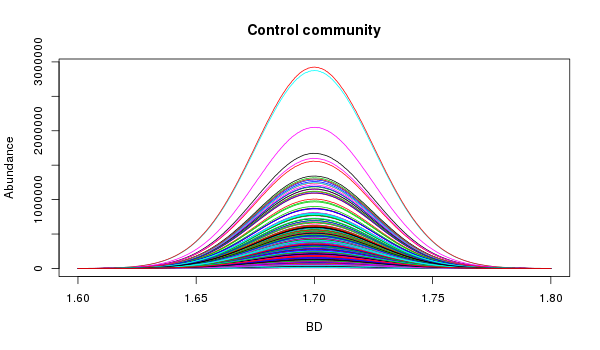

In [720]:
%%R -w 600 -h 350
mu1 = coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") #, countParams = list(alpha = 0.5))

matplot(locs, mu1, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

In [721]:
%%R
# just using 1st taxon as reference
ref = 1

In [722]:
%%R 
# treatment community
set.seed(2)
M <- n.taxa                                      # number of species
opt.treat = opt + runif(M, min=0, max=0.036)
pars <- cbind(opt = opt.treat, tol = tol, h = h)  # put in a matrix

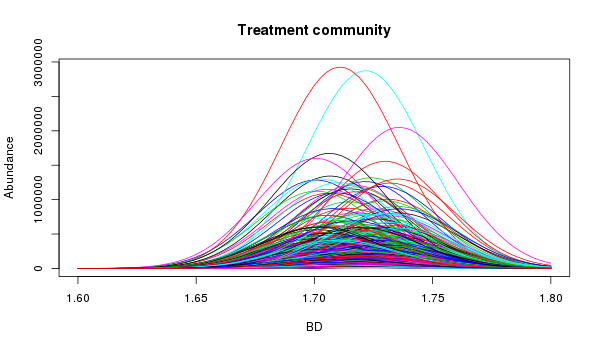

In [723]:
%%R -w 600 -h 350
mu2 = coenocline(locs, responseModel = "gaussian", params = pars, countModel = "poisson")

mu2[,ref] = mu1[,ref]

matplot(locs, mu2, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

### Convert to relative abundances

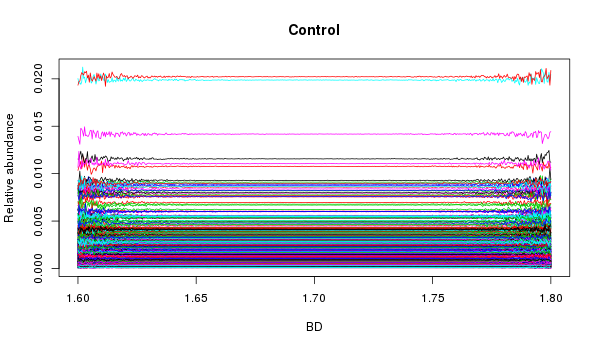

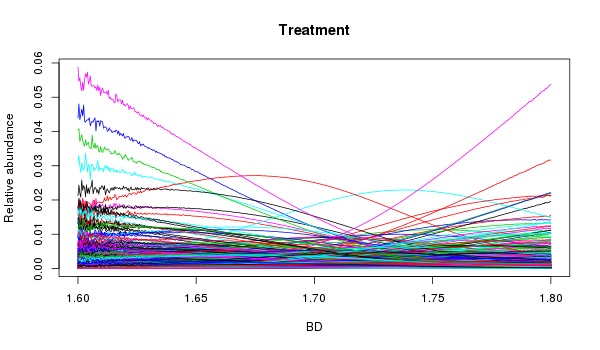

In [724]:
%%R -w 600 -h 350
mu1.rel = t(apply(mu1, 1, to.rel))
mu2.rel = t(apply(mu2, 1, to.rel))


matplot(locs, mu1.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs, mu2.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

### Difference in euclidean mode BD 

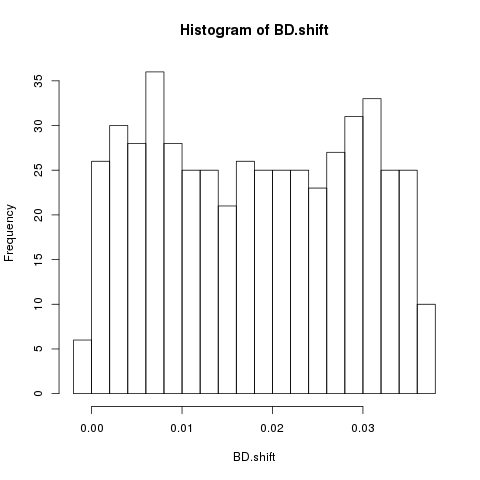

In [725]:
%%R

mode.BD = function(x, loc){
    loc[which(x == max(x))][1]
}

mu1.mode = apply(mu1, 2, mode.BD, loc=locs)
mu2.mode = apply(mu2, 2, mode.BD, loc=locs)


BD.shift = mu2.mode - mu1.mode
hist(BD.shift, breaks=20)

### Calculating Aitchison variance to marker reference

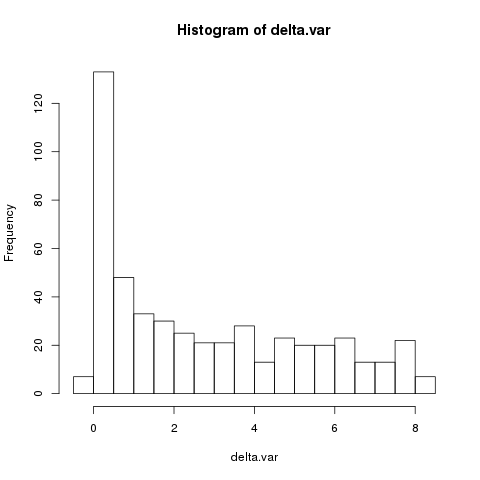

In [726]:
%%R
mu1.rel.acomp = acomp(mu1.rel)
mu2.rel.acomp = acomp(mu2.rel)

mu1.var = variation(mu1.rel.acomp)[ref,]
mu2.var = variation(mu2.rel.acomp)[ref,]

delta.var = mu2.var - mu1.var
hist(delta.var, breaks=20)

### Plotting delta_BD ~ delta_var 

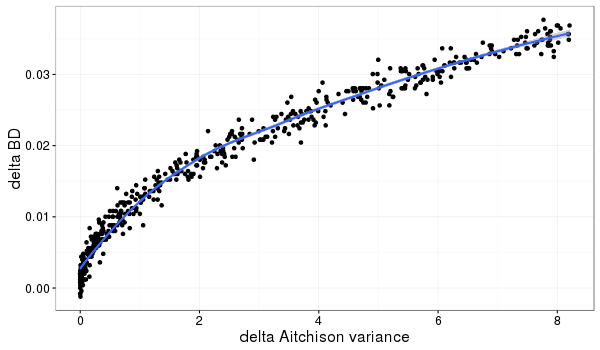

In [727]:
%%R -w 600 -h 350
df.shift = data.frame('taxon' = 1:ncol(mu1), 'BD.shift' = BD.shift, 'delta.var' = delta.var) %>%
    filter(taxon != ref)

ggplot(df.shift, aes(delta.var, BD.shift)) +
    geom_point() +
    geom_smooth() +
    labs(x='delta Aitchison variance', y='delta BD') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

## Control taxa w/ varying G+C

In [728]:
%%R
n.taxa = 500
n.fracs = 500

In [729]:
%%R 
set.seed(2)
M <- n.taxa                                 # number of species
ming <- 1.60                                # gradient minimum...
maxg <- 1.80                                # ...and maximum
meang = mean(c(ming, maxg))
locs <- seq(ming, maxg, length = n.fracs)   # gradient locations
opt.cont  <- rnorm(M, mean=meang, sd=0.01)          # runif(M, min = ming, max = maxg)   # species optima
#opt.cont[which(opt.cont == min(opt.cont))[1]] = min(opt.cont) - 0.01
tol  <- rep(0.025, M)                       # species tolerances
h    <- ceiling(rlnorm(M, meanlog = 12))    # max abundances
pars <- cbind(opt = opt.cont, tol = tol, h = h)  # put in a matrix

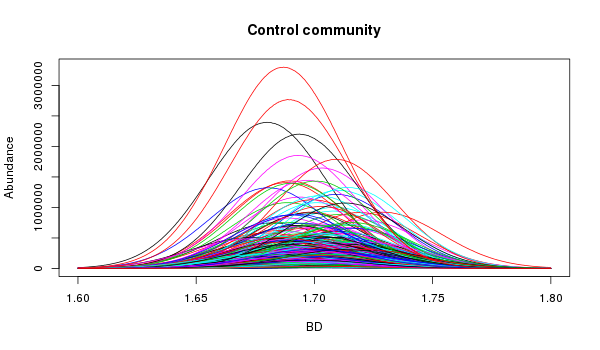

In [730]:
%%R -w 600 -h 350
mu1 = coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") #, countParams = list(alpha = 0.5))

matplot(locs, mu1, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

In [731]:
%%R
# Picking a refernece taxon
mu1.mode = apply(mu1, 2, mode.BD, loc=locs)
## low GC
ref = which(mu1.mode == min(mu1.mode))
## mid GC
#ref = which(mu1.mode == median(mu1.mode))[1]
ref

[1] 402


In [732]:
%%R 
# treatment community
set.seed(2)
M <- n.taxa                                      # number of species
opt.treat = opt.cont + runif(M, min=0, max=0.036)
pars <- cbind(opt = opt.treat, tol = tol, h = h)  # put in a matrix

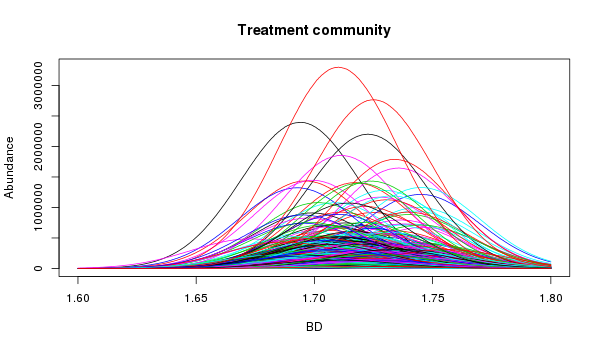

In [733]:
%%R -w 600 -h 350
mu2 = coenocline(locs, responseModel = "gaussian", params = pars, countModel = "poisson")

mu2[,ref] = mu1[,ref]

matplot(locs, mu2, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

### Convert to relative abundances

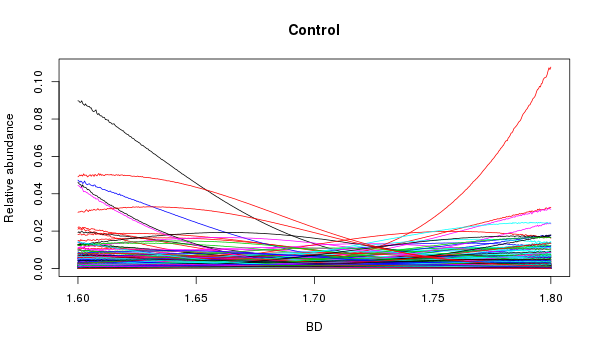

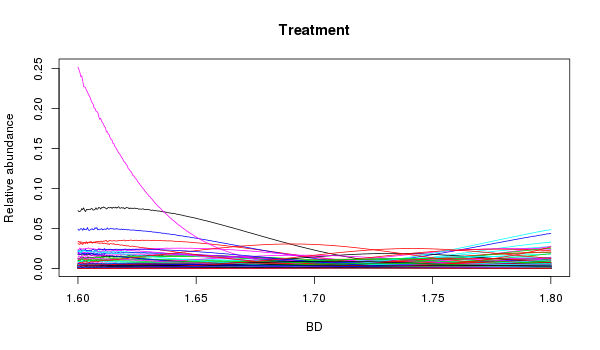

In [734]:
%%R -w 600 -h 350
mu1.rel = t(apply(mu1, 1, to.rel))
mu2.rel = t(apply(mu2, 1, to.rel))


matplot(locs, mu1.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs, mu2.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

### Difference in euclidean mode BD 

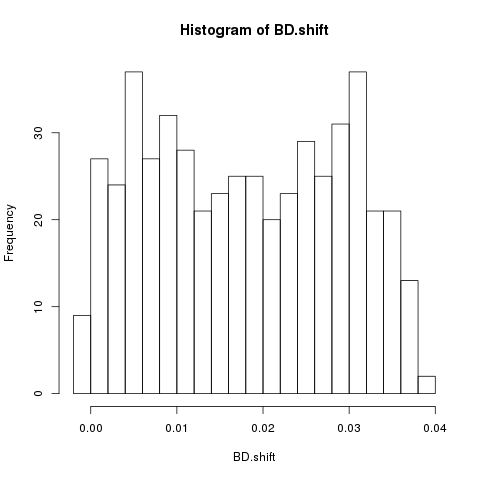

In [735]:
%%R

mu1.mode = apply(mu1, 2, mode.BD, loc=locs)
mu2.mode = apply(mu2, 2, mode.BD, loc=locs)


BD.shift = mu2.mode - mu1.mode
hist(BD.shift, breaks=20)

### Calculating Aitchison variance to marker reference

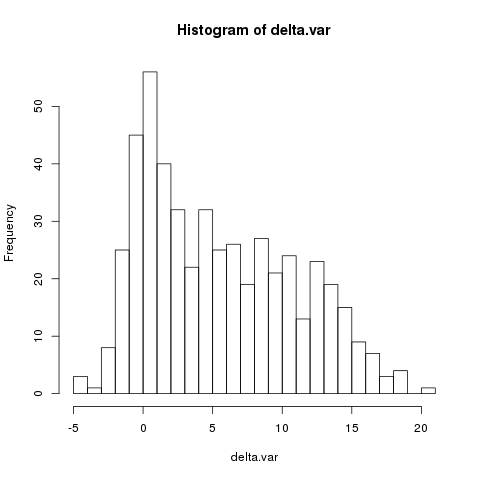

In [736]:
%%R
mu1.rel.acomp = acomp(mu1.rel)
mu2.rel.acomp = acomp(mu2.rel)

mu1.var = variation(mu1.rel.acomp)[ref,]
mu2.var = variation(mu2.rel.acomp)[ref,]

delta.var = mu2.var - mu1.var
hist(delta.var, breaks=20)

### Plotting delta_BD ~ delta_var 

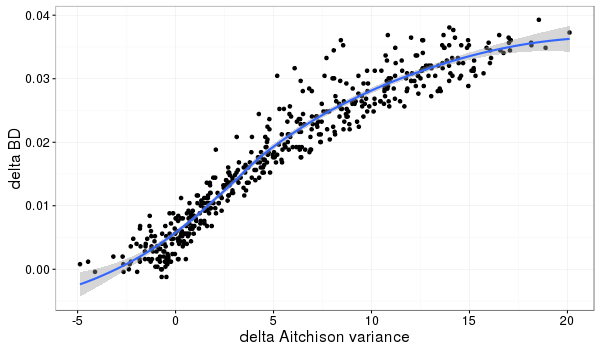

In [737]:
%%R -w 600 -h 350
df.shift = data.frame('taxon' = 1:ncol(mu1), 'BD.shift' = BD.shift, 'delta.var' = delta.var) %>%
    filter(taxon != ref)


ggplot(df.shift, aes(delta.var, BD.shift)) +
    geom_point() +
    geom_smooth() +
    labs(x='delta Aitchison variance', y='delta BD') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

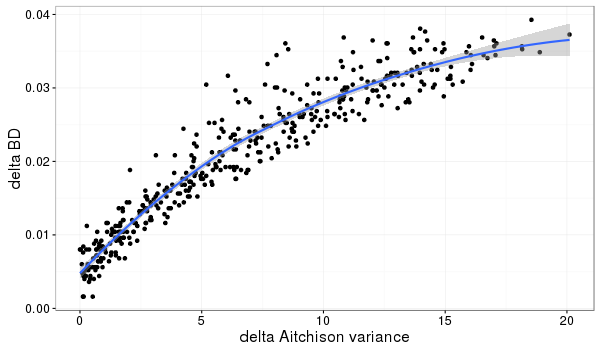

In [738]:
%%R -w 600 -h 350
# just positive Aitchison variance
ggplot(df.shift %>% filter(delta.var >= 0), aes(delta.var, BD.shift)) +
    geom_point() +
    geom_smooth() +
    labs(x='delta Aitchison variance', y='delta BD') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

### plotting euclidean values for taxa with negative Aitchison shift

[1] 82
[1] 82


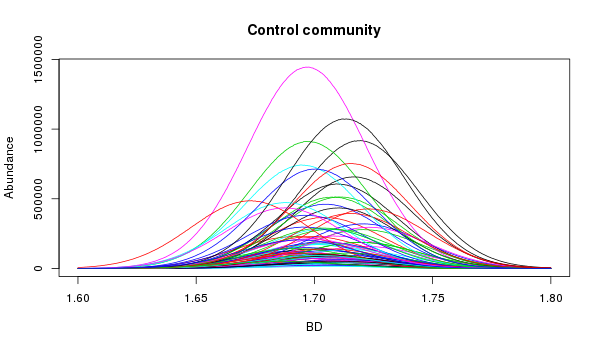

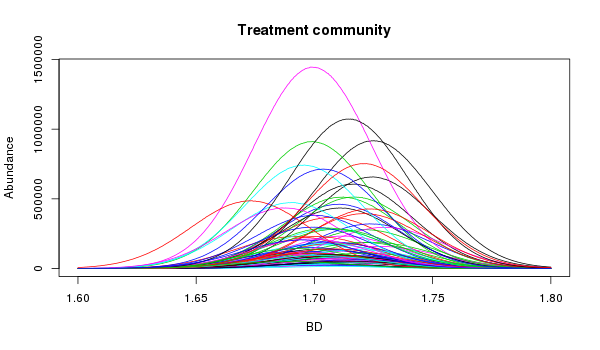

In [739]:
%%R -w 600 -h 350
df.shift = data.frame('taxon' = 1:ncol(mu1), 'BD.shift' = BD.shift, 'delta.var' = delta.var) 
df.shift.nVar = df.shift %>%
    filter(delta.var < 0 | taxon == ref)

mu1.nVar = mu1[,df.shift.nVar$taxon]
mu1.nVar %>% ncol %>% print
mu2.nVar = mu2[,df.shift.nVar$taxon]
mu2.nVar %>% ncol %>% print

matplot(locs, mu1.nVar, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

matplot(locs, mu2.nVar, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

[1] 5
[1] 5


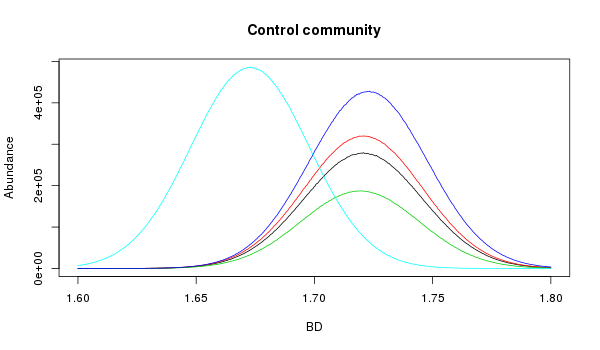

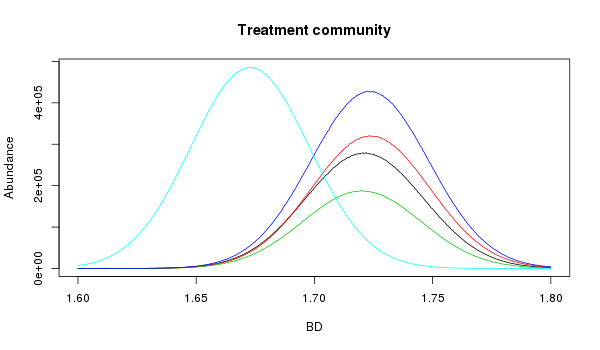

In [740]:
%%R -w 600 -h 350
df.shift = data.frame('taxon' = 1:ncol(mu1), 'BD.shift' = BD.shift, 'delta.var' = delta.var) 
df.shift.nVar = df.shift %>%
    filter(delta.var < -3 | taxon == ref)

mu1.nVar = mu1[,df.shift.nVar$taxon]
mu1.nVar %>% ncol %>% print
mu2.nVar = mu2[,df.shift.nVar$taxon]
mu2.nVar %>% ncol %>% print

matplot(locs, mu1.nVar, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

matplot(locs, mu2.nVar, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

[1] 418
[1] 418


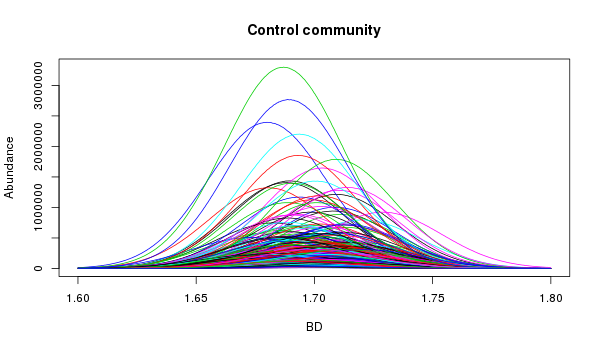

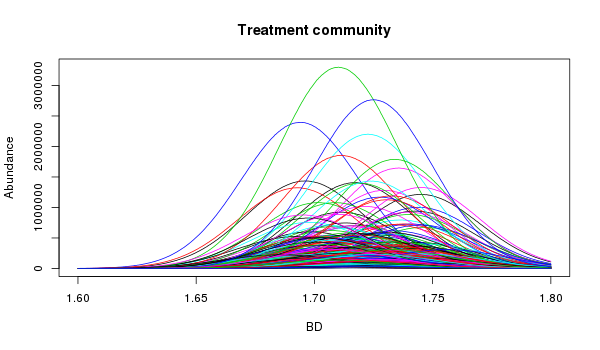

In [741]:
%%R -w 600 -h 350
# plotting euclidean values for taxa with negative Aitchison shift
df.shift.var = df.shift %>%
    filter(delta.var > 0)

mu1.var = mu1[,df.shift.var$taxon]
mu1.var %>% ncol %>% print
mu2.var = mu2[,df.shift.var$taxon]
mu2.var %>% ncol %>% print

matplot(locs, mu1.var, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

matplot(locs, mu2.var, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

## Uniformly distributed reference marker

In [754]:
%%R
n.taxa = 500
n.fracs = 500

In [755]:
%%R 
set.seed(2)
M <- n.taxa                                 # number of species
ming <- 1.60                                # gradient minimum...
maxg <- 1.80                                # ...and maximum
meang = mean(c(ming, maxg))
locs <- seq(ming, maxg, length = n.fracs)   # gradient locations
opt.cont  <- rnorm(M, mean=meang, sd=0.01)          # runif(M, min = ming, max = maxg)   # species optima
#opt.cont[which(opt.cont == min(opt.cont))[1]] = min(opt.cont) - 0.01
tol  <- rep(0.025, M)                       # species tolerances
h    <- ceiling(rlnorm(M, meanlog = 12))    # max abundances
pars <- cbind(opt = opt.cont, tol = tol, h = h)  # put in a matrix

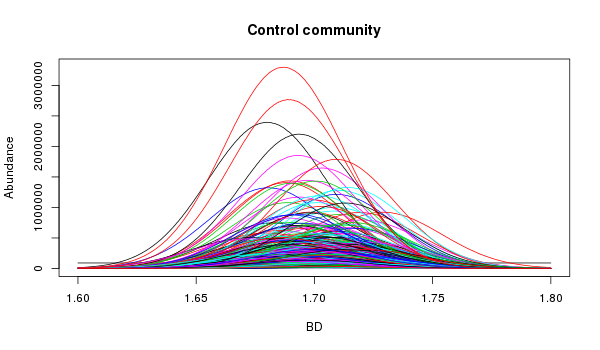

In [756]:
%%R -w 600 -h 350
mu1 = coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") #, countParams = list(alpha = 0.5))

# unform reference marker
ref = 1
mu1[,ref] = runif(nrow(mu1), min=mean(mu1 %>% as.vector), max=mean(mu1 %>% as.vector))

matplot(locs, mu1, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Control community')

In [757]:
%%R 
# treatment community
set.seed(2)
M <- n.taxa                                      # number of species
opt.treat = opt.cont + runif(M, min=0, max=0.036)
pars <- cbind(opt = opt.treat, tol = tol, h = h)  # put in a matrix

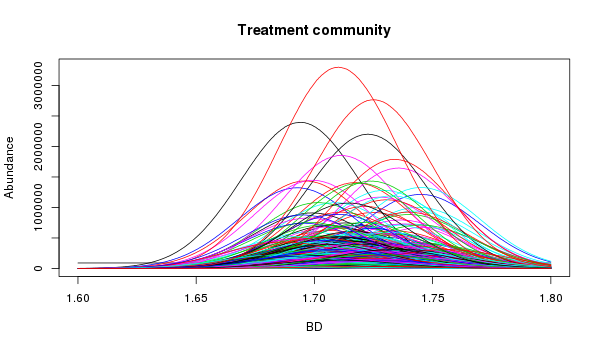

In [758]:
%%R -w 600 -h 350
mu2 = coenocline(locs, responseModel = "gaussian", params = pars, countModel = "poisson")

mu2[,ref] = mu1[,ref]

matplot(locs, mu2, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Abundance", main='Treatment community')

### Convert to relative abundances

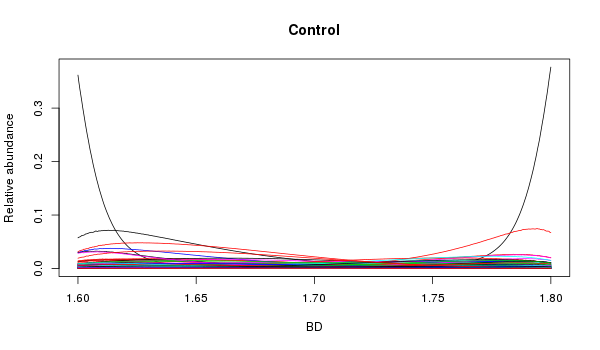

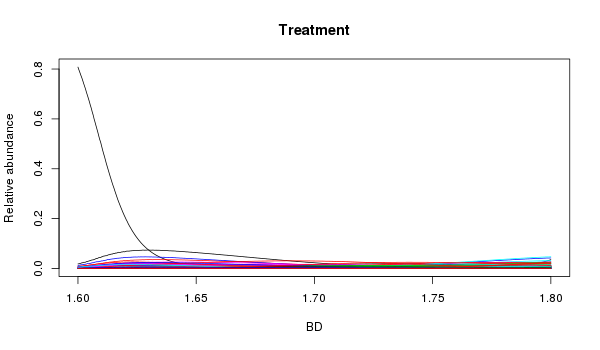

In [759]:
%%R -w 600 -h 350
mu1.rel = t(apply(mu1, 1, to.rel))
mu2.rel = t(apply(mu2, 1, to.rel))


matplot(locs, mu1.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Control')
matplot(locs, mu2.rel, lty = "solid", type = "l", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = "Relative abundance", main='Treatment')

### ALR transformation

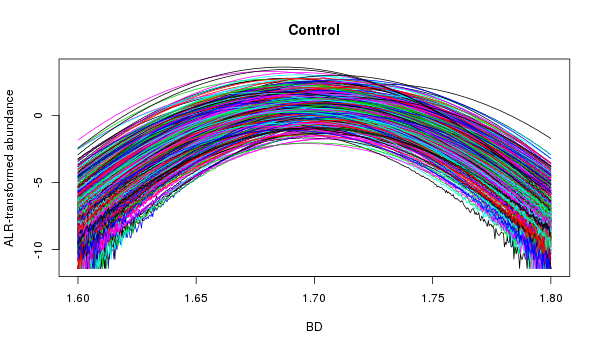

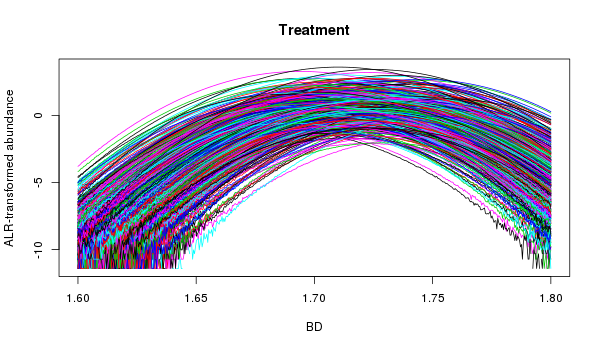

In [760]:
%%R -w 600 -h 350

mu1.rel.alr = alr(mu1.rel, ivar=1)
mu2.rel.alr = alr(mu2.rel, ivar=1)


ylab = 'ALR-transformed abundance'
matplot(locs, mu1.rel.alr, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = ylab, main='Control')
matplot(locs, mu2.rel.alr, lty = "solid", type = "l", cex = 0.8,
        xlab = "BD", ylab = ylab, main='Treatment')

***
# -- OLD --

# ALR transformation

* using marker for transformation

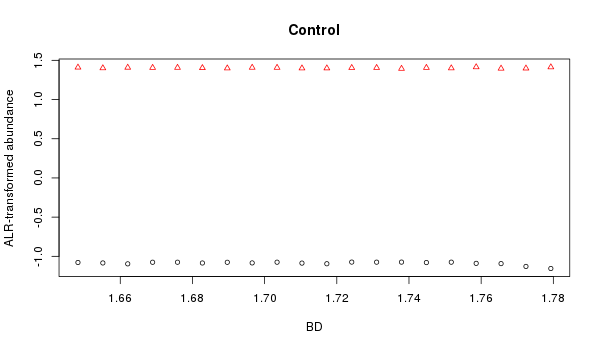

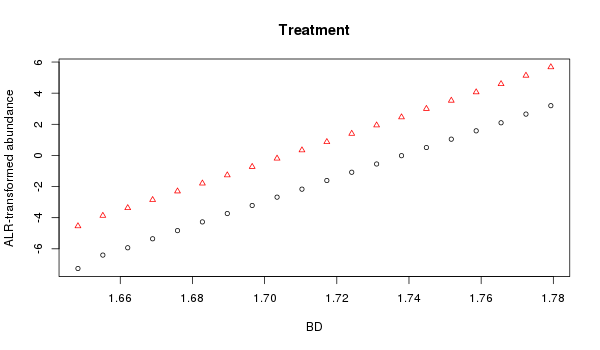

In [22]:
%%R -w 600 -h 350
comm.cont.rel.alr = alr(comm.cont.rel, ivar=2)
comm.treat.rel.alr = alr(comm.treat.rel, ivar=2)


ylab = 'ALR-transformed abundance'
matplot(locs.p, comm.cont.rel.alr, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = ylab, main='Control')
matplot(locs.p, comm.treat.rel.alr, lty = "solid", type = "p", pch = 1:10, cex = 0.8,
        xlab = "BD", ylab = ylab, main='Treatment')

# Aitchison pairwise distance sandbox

In [774]:
%%R
data(expenditures)
x <- xOrig <- expenditures
## Aitchison distance between the first 2 observations:
x = x %>% as.data.frame

x = apply(x, 1, function(x) x / sum(x)) %>% t


aDist(x[1,], x[2,])
     

[1] 1.626736


In [10]:
%%R

.aDist = function(x, df){
    i = x[1]
    ii = x[2]
    aDist(df[i,], df[ii,])
}

aDist.all = function(df, meta=NULL){
    # pairwise aDist on all rows
    i.ii = combn(1:nrow(df), m=2)
    vals = apply(i.ii, 2, .aDist, df=df)
    
    vals = cbind(i.ii %>% t, vals)
    vals = as.data.frame(vals)
    colnames(vals) = c('V1', 'V2', 'aDist')
    
    # adding metadata if provided
    if(! is.null(meta)){
        if(class(meta) == 'matrix'){
            meta = as.data.frame(meta)
        }
        if(class(meta) != 'data.frame'){
            meta = data.frame(1:length(meta), meta)
            colnames(meta)[1] = c('V1')
        }
        
        name1 = colnames(vals)[1]
        name2 = colnames(meta)[1]
        vals = inner_join(vals, meta, c(V1 = name2))
        vals = inner_join(vals, meta, c(V2 = name2))
    }
    
    return(vals)
}


comm.cont.rel.ad = aDist.all(comm.cont.rel, locs.p)
comm.treat.rel.ad = aDist.all(comm.treat.rel, locs.p)

   V1 V2       aDist   meta.x   meta.y
1   2  3 0.013437460 1.655172 1.662069
2   2  4 0.006382064 1.655172 1.668966
3   2  5 0.006737488 1.655172 1.675862
4   2  6 0.002114017 1.655172 1.682759
5   2  7 0.007936245 1.655172 1.689655
6   2  8 0.005398429 1.655172 1.696552
7   2  9 0.006797426 1.655172 1.703448
8   2 10 0.001710679 1.655172 1.710345
9   2 11 0.007898804 1.655172 1.717241
10  2 12 0.007852188 1.655172 1.724138
11  2 13 0.007130098 1.655172 1.731034
12  2 14 0.012643957 1.655172 1.737931
13  2 15 0.003934901 1.655172 1.744828
14  2 16 0.008588311 1.655172 1.751724
15  2 17 0.013331109 1.655172 1.758621
16  2 18 0.006012637 1.655172 1.765517
17  2 19 0.035250745 1.655172 1.772414
18  2 20 0.063416892 1.655172 1.779310


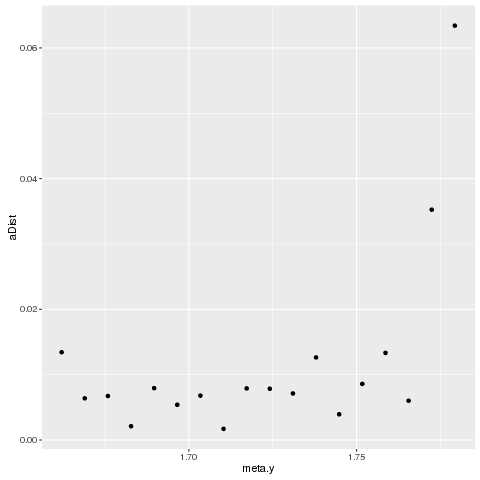

In [15]:
%%R

comm.cont.rel.ad.f = comm.cont.rel.ad %>%
    filter(V1 == 2)

comm.cont.rel.ad.f %>% print

ggplot(comm.cont.rel.ad.f, aes(meta.y, aDist)) +
    geom_point()